<a href="https://colab.research.google.com/github/Pavan3avn/pytorch-basics/blob/main/Autograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import matplotlib.pyplot as plt
import matplotlib.ticker  as ticker
import math

In [ ]:

# create a linespace
a = torch.linspace(0, 2 * math.pi, steps=25, requires_grad=True)

In [ ]:
a

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)

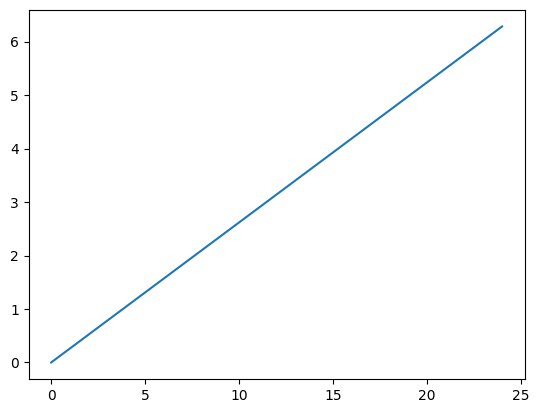

In [ ]:
plt.plot(a.detach())

In [ ]:
b = torch.sin(a)
b

tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)

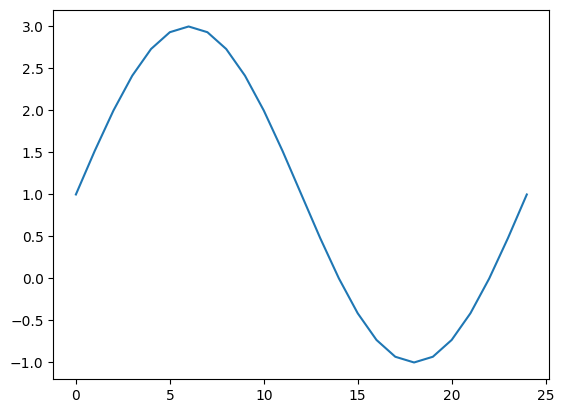

In [ ]:
plt.plot(d.detach())

In [ ]:
c = b * 2
c

tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
         1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
         1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
        -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
        -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)

In [ ]:
d = c+1
d

tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
         2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
         2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, -3.5763e-07,
        -4.1421e-01, -7.3205e-01, -9.3185e-01, -1.0000e+00, -9.3185e-01,
        -7.3205e-01, -4.1421e-01,  4.7684e-07,  4.8236e-01,  1.0000e+00],
       grad_fn=<AddBackward0>)

In [ ]:
out = d.sum()
out

tensor(25., grad_fn=<SumBackward0>)

In [ ]:
# grad_fn usage
print("d:")
print(d.grad_fn)
print(d.grad_fn.next_functions)
print(d.grad_fn.next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)

d:
((<MulBackward0 object at 0x7a1349245750>, 0), (None, 0))
((<SinBackward0 object at 0x7a1349815420>, 0), (None, 0))
((<AccumulateGrad object at 0x7a13498142e0>, 0),)


In [ ]:
print("c:")
print(c.grad_fn)
print(c.grad_fn.next_functions)
print(c.grad_fn.next_functions[0][0].next_functions)

c:
((<SinBackward0 object at 0x7a1349817940>, 0), (None, 0))
((<AccumulateGrad object at 0x7a13498141f0>, 0),)


In [ ]:
print("b:")
print(b.grad_fn)
print(b.grad_fn.next_functions)

b:
((<AccumulateGrad object at 0x7a1349746680>, 0),)


In [ ]:
print("a:")
print(a.grad_fn)

a:
None


In [ ]:
out.backward()

In [ ]:
print(a.grad)

tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00])


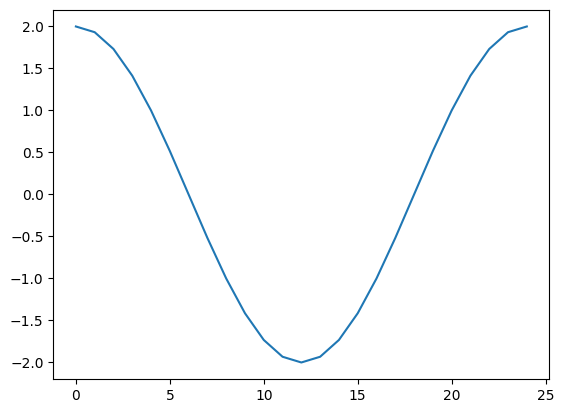

In [ ]:
plt.plot(a.grad.detach())

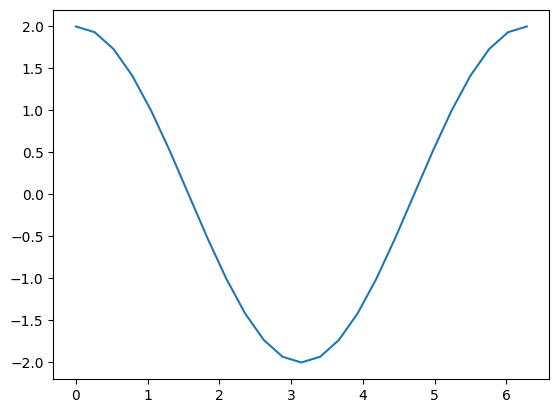

In [ ]:
plt.plot(a.detach(),a.grad.detach())

/tmp/ipython-input-3238518479.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  b.grad


### Example of Auto grad usage using an simple Model training


In [ ]:
DIM_IN = 1000
DIM_OUT = 10
HIDDEN_SIZE = 100
BATCH_SIZE  = 16

class TinyModel(torch.nn.Module):

  def __init__(self):
    super(TinyModel, self).__init__()

    self.layer1 = torch.nn.Linear(DIM_IN, HIDDEN_SIZE)
    self.relu = torch.nn.ReLU()
    self.layer2 = torch.nn.Linear(HIDDEN_SIZE, DIM_OUT)


  def forward(self, x):
    x = self.layer1(x)
    x = self.relu(x)
    x = self.layer2(x)
    return x


In [ ]:
input = torch.zeros(BATCH_SIZE, DIM_IN, requires_grad=False)
output_req = torch.ones(BATCH_SIZE, DIM_OUT, requires_grad=False)

In [ ]:

model = TinyModel()

In [ ]:
model.layer2.weight[0].grad

/tmp/ipython-input-3621958539.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  model.layer2.weight[0].grad


In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)


In [ ]:
for i in range(0,5):
  prediction = model(input)
  loss = (output_req-prediction).pow(2).sum()
  loss.backward()

optimizer.zero_grad(set_to_none=False)

In [ ]:
model.layer1.weight.grad_fn

NameError: name 'model' is not defined